In [1]:
import pandas as pd

df = pd.read_csv("shop data.csv")
df

,age,income,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,single,no
6,25-35,low,female,married,yes
7,<25,medium,male,married,no
8,<25,low,female,single,yes
9,>35,medium,female,married,yes


In [2]:
x = df.iloc[:,:-1]

In [3]:
x

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single
5,>35,low,female,single
6,25-35,low,female,married
7,<25,medium,male,married
8,<25,low,female,single
9,>35,medium,female,married


In [4]:
y = df.iloc[:,4]

In [5]:
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
14     no
Name: buys, dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
Le_x = LabelEncoder()

In [8]:
a = x.apply(LabelEncoder().fit_transform)

In [9]:
a

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,1
6,0,1,0,0
7,1,2,1,0
8,1,1,0,1
9,2,2,0,0


In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
u = KNeighborsClassifier(n_neighbors=3)

In [12]:
import numpy as np

In [13]:
u.fit(a,y)

KNeighborsClassifier(n_neighbors=3)

In [15]:
predicted=u.predict([[1,1,1,1]])
print(predicted)

['no']


In [16]:
predicted=u.predict([[1,0,1,1]])
print(predicted)

['no']


In [17]:
predicted=u.predict([[0,0,0,1]])
print(predicted)

['yes']


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [19]:
df.shape

(15, 5)

<AxesSubplot:xlabel='age', ylabel='count'>

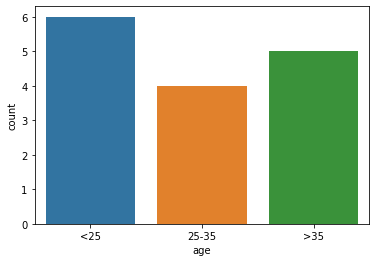

In [20]:
sns.countplot(df['age'])

<AxesSubplot:xlabel='income', ylabel='count'>

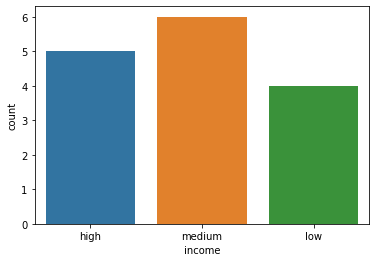

In [21]:
sns.countplot(df['income'])

<AxesSubplot:xlabel='gender', ylabel='count'>

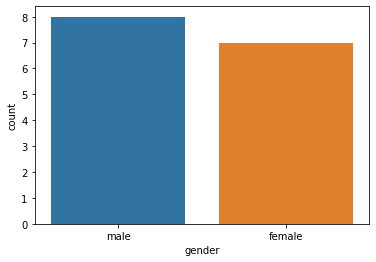

In [22]:
sns.countplot(df['gender'])

<AxesSubplot:xlabel='m_status', ylabel='count'>

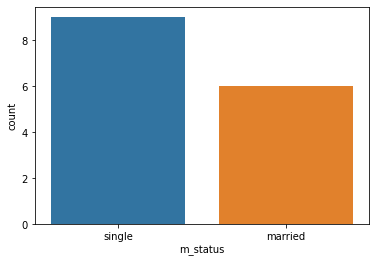

In [23]:
sns.countplot(df['m_status'])

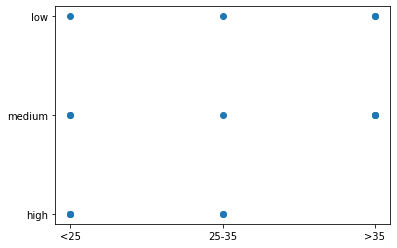

In [24]:
plt.scatter(df['age'],df['income'])

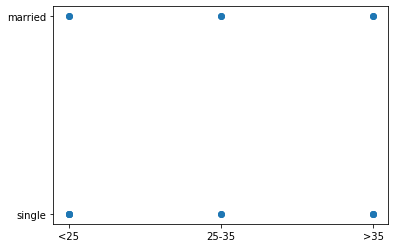

In [30]:
plt.scatter(df['age'],df['m_status'])

In [36]:
Le_df = LabelEncoder()

In [37]:
e = df.apply(LabelEncoder().fit_transform)

In [38]:
e

,age,income,gender,m_status,buys
0,1,0,1,1,0
1,1,0,1,0,0
2,0,0,1,1,1
3,2,2,1,1,1
4,2,1,0,1,1
5,2,1,0,1,0
6,0,1,0,0,1
7,1,2,1,0,0
8,1,1,0,1,1
9,2,2,0,0,1


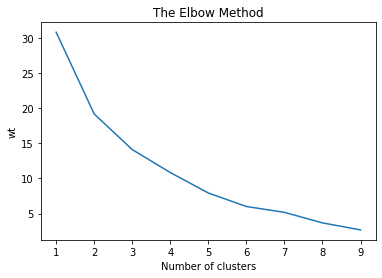

In [39]:
##Elbow method to find k
wt=[]
for i in range(1, 10):
    kmeans=KMeans(n_clusters=i , init= 'k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(e)
    wt.append(kmeans.inertia_)
plt.plot(range(1, 10),wt)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wt')
plt.show()

In [40]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(e)

KMeans(n_clusters=3, random_state=0)

In [41]:
predicted_cluster=kmeans.fit_predict(e)
predicted_cluster

array([1, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 0, 1])

In [42]:
new_table=df.copy()
new_table['cluster']=predicted_cluster
new_table

,age,income,gender,m_status,buys,cluster
0,<25,high,male,single,no,1
1,<25,high,male,married,no,1
2,25-35,high,male,single,yes,1
3,>35,medium,male,single,yes,0
4,>35,low,female,single,yes,0
5,>35,low,female,single,no,0
6,25-35,low,female,married,yes,2
7,<25,medium,male,married,no,2
8,<25,low,female,single,yes,0
9,>35,medium,female,married,yes,0


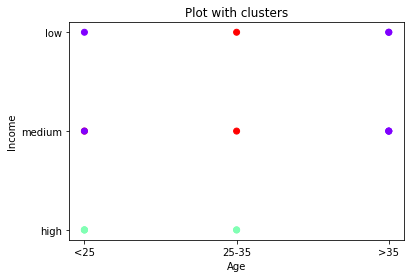

In [43]:
plt.scatter(new_table['age'],new_table['income'],c=new_table['cluster'],cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Plot with clusters')
plt.show()

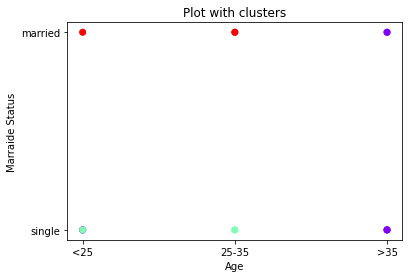

In [44]:
plt.scatter(new_table['age'],new_table['m_status'],c=new_table['cluster'],cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Marraide Status')
plt.title('Plot with clusters')
plt.show()

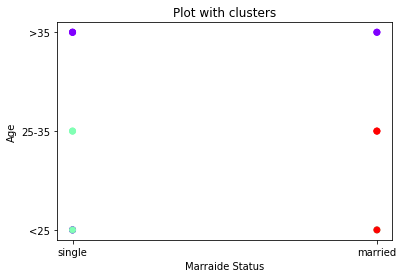

In [45]:
plt.scatter(new_table['m_status'],new_table['age'],c=new_table['cluster'],cmap='rainbow')
plt.xlabel('Marraide Status')
plt.ylabel('Age')
plt.title('Plot with clusters')
plt.show()